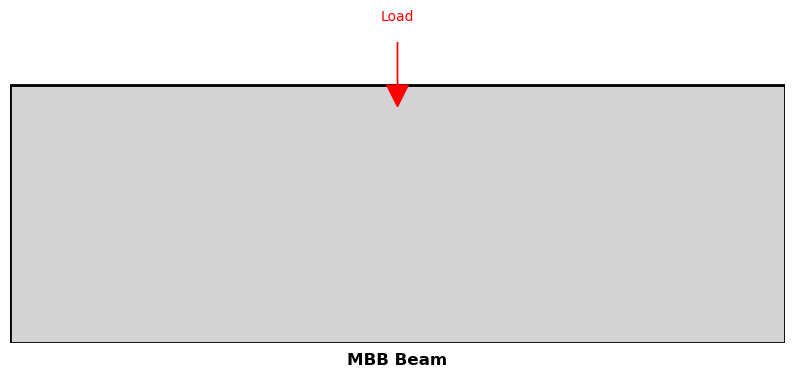

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Define beam dimensions
beam_length = 180
beam_height = 60

# Create a plot
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_xlim(0, beam_length)
ax.set_ylim(0, beam_height + 10)  # Add some space above the beam for the arrow

# Draw the beam rectangle
beam_rect = plt.Rectangle((0, 0), beam_length, beam_height, linewidth=2, edgecolor='black', facecolor='lightgrey')
ax.add_patch(beam_rect)

# Define center point for load application
load_x = beam_length / 2
load_y = beam_height

# Plot the downward load arrow, starting slightly above the beam
arrow_length = 10  # Length of the arrow
ax.arrow(load_x, load_y + arrow_length, 0, -arrow_length, head_width=5, head_length=5, fc='red', ec='red')

# Add text labels
ax.text(load_x, load_y + arrow_length + 5, 'Load', ha='center', color='red')
ax.text(beam_length / 2, -5, 'MBB Beam', ha='center', fontsize=12, fontweight='bold')

# Mark the fixed boundaries (assuming both ends are supported)
support_height = 5  # Height of the support triangles
support_width = 10  # Width of the support triangles

# Left support
left_support_x = 0
left_support_y = 0
ax.plot([left_support_x, left_support_x + support_width / 2, left_support_x - support_width / 2, left_support_x],
        [left_support_y, left_support_y - support_height, left_support_y - support_height, left_support_y],
        'k', linewidth=1.5)

# Right support
right_support_x = beam_length
right_support_y = 0
ax.plot([right_support_x, right_support_x + support_width / 2, right_support_x - support_width / 2, right_support_x],
        [right_support_y, right_support_y - support_height, right_support_y - support_height, right_support_y],
        'k', linewidth=1.5)

# Adjust plot
ax.set_aspect('equal')
ax.axis('off')  # Turn off axis
# plt.title("MBB Beam in Topology Optimization with Center Load")

plt.show()


In [2]:
import sympy as sp
x = sp.symbols('x')
A = sp.Matrix([[x**2, sp.sin(x)], [sp.exp(x), x]])
integrated_matrix = A.applyfunc(lambda elem: sp.integrate(elem, x))
print(integrated_matrix)

differentiated_matrix = A.applyfunc(lambda elem: sp.diff(elem, x))
print(differentiated_matrix)

Matrix([[x**3/3, -cos(x)], [exp(x), x**2/2]])
Matrix([[2*x, cos(x)], [exp(x), 1]])


In [3]:
import sympy as sp

# Define the symbolic variable and matrix
x = sp.symbols('x')
A = sp.Matrix([[x**2, sp.sin(x)], [sp.exp(x), x]])

# Differentiate the matrix
differentiated_matrix = A.applyfunc(lambda elem: sp.diff(elem, x))

# Evaluate at x = 2
evaluated_matrix = differentiated_matrix.subs(x, 2)
print("Differentiated Matrix at x=2:")
print(evaluated_matrix)

# If you want to evaluate at multiple points (e.g., x = 1, 2, 3):
values = [1, 2, 3]
for val in values:
    print(f"Differentiated Matrix at x={val}:")
    print(differentiated_matrix.subs(x, val))


Differentiated Matrix at x=2:
Matrix([[4, cos(2)], [exp(2), 1]])
Differentiated Matrix at x=1:
Matrix([[2, cos(1)], [E, 1]])
Differentiated Matrix at x=2:
Matrix([[4, cos(2)], [exp(2), 1]])
Differentiated Matrix at x=3:
Matrix([[6, cos(3)], [exp(3), 1]])


In [4]:
# Integrate the matrix
integrated_matrix = A.applyfunc(lambda elem: sp.integrate(elem, x))

# Evaluate the integrated matrix at x = 2
evaluated_integrated_matrix = integrated_matrix.subs(x, 2)
print("Integrated Matrix at x=2:")
print(evaluated_integrated_matrix)


Integrated Matrix at x=2:
Matrix([[8/3, -cos(2)], [exp(2), 2]])


In [10]:
np.array(evaluated_matrix.evalf(), dtype=float), np.array(evaluated_integrated_matrix.evalf(), dtype = float)

(array([[ 4.        , -0.41614684],
        [ 7.3890561 ,  1.        ]]),
 array([[2.66666667, 0.41614684],
        [7.3890561 , 2.        ]]))

In [6]:
import sympy as sp
import numpy as np

# Define the symbolic variable and matrix
x = sp.symbols('x')
A = sp.Matrix([[x**2, sp.sin(x)], [sp.exp(x), x]])

# Differentiate the matrix
differentiated_matrix = A.applyfunc(lambda elem: sp.diff(elem, x))

# Evaluate at x = 2
evaluated_matrix = differentiated_matrix.subs(x, 2)

# Convert the evaluated matrix to a NumPy array
numpy_array = np.array(evaluated_matrix.tolist(), dtype=float)

print("Evaluated Matrix as a NumPy Array:")
print(numpy_array)


Evaluated Matrix as a NumPy Array:
[[ 4.         -0.41614684]
 [ 7.3890561   1.        ]]


In [7]:
evaluated_matrix

Matrix([
[     4, cos(2)],
[exp(2),      1]])